## Plan Our Approach

> What sport are we tracking
>> Pickleball

> What data are we tracking? <br>
> These represent columns of the data, each row represents a player in game.
>>* Name
>>* Game
>>* Average outdoor temperature
>>* Points for 
>>* Points conceded
>>* Balls into net
>>* Overhit balls
>>* Distance traveled
>>* Heartrate (need whole different dataset with this)

> What kind of calculations would we want to perform?
>>* Mistakes per game
>>* Average point differential
>>* (Balls into net + Overhit balls) / Points won -- Ratio of points won to mistakes made
>>* Finding average heartrate when losing vs winning
>>* Finding average temperature when losing vs winning

> How would we want to summarize and present the results?
>>* See what can improve on or avoid. 
>>* See what characteristic lead to winning more.

## Using ChatGPT to Generate Synthetic Data
> Prompt we provided:
>> can you create a 10 indexed dictionary with these attributes with random data. 
>>* Name
>>* Game
>>* Average outdoor temperature
>>* Points for 
>>* Points conceded
>>* Balls into net
>>* Overhit balls
>>* Distance traveled
>>* Heartrate (need whole different dataset with this)

In [14]:
import random

# Define lists of random data to choose from
names = ["Javier", "Zach", "Maurice", "Alex", "Taylor", "Jordan", "Casey", "Riley", "Morgan", "Blake"]
games = list(range(1, 6))  # Assume games 1 to 5
temperatures = list(range(70, 91))  # Average outdoor temperatures between 70°F and 90°F
points = list(range(6, 12))  # Points scored (6 to 11)
points_conceded = list(range(5, 12))  # Points conceded (5 to 11)
balls_into_net = list(range(1, 10))  # Balls into the net (1 to 9)
overhit_balls = list(range(0, 5))  # Overhit balls (0 to 4)
distances = [round(random.uniform(0.5, 2.0), 2) for _ in range(10)]  # Distance traveled (0.5 to 2.0 miles)
heart_rates = list(range(120, 151))  # Heart rates (120 to 150 bpm)

# Generate the dictionary
random_data = {
    i: {
        "Name": random.choice(names),
        "Game": random.choice(games),
        "Average Outdoor Temperature (°F)": random.choice(temperatures),
        "Points For": random.choice(points),
        "Points Conceded": random.choice(points_conceded),
        "Balls Into Net": random.choice(balls_into_net),
        "Overhit Balls": random.choice(overhit_balls),
        "Distance Traveled (miles)": random.choice(distances),
        "Average Heart Rate (bpm)": random.choice(heart_rates)
    }
    for i in range(1, 11)
}

In [15]:
import pandas as pd

df = pd.DataFrame.from_dict(random_data, orient='index')

In [16]:
# grouping by name
grouped_df = df.groupby('Name')

In [17]:
for name, group in grouped_df:
    print(group)

    Name  Game  Average Outdoor Temperature (°F)  Points For  Points Conceded  \
2  Casey     3                                80          10               11   

   Balls Into Net  Overhit Balls  Distance Traveled (miles)  \
2               9              2                       1.63   

   Average Heart Rate (bpm)  
2                       134  
      Name  Game  Average Outdoor Temperature (°F)  Points For  \
10  Javier     2                                90           8   

    Points Conceded  Balls Into Net  Overhit Balls  Distance Traveled (miles)  \
10                6               6              2                       1.97   

    Average Heart Rate (bpm)  
10                       121  
     Name  Game  Average Outdoor Temperature (°F)  Points For  \
5  Jordan     3                                81           7   
8  Jordan     1                                73          11   

   Points Conceded  Balls Into Net  Overhit Balls  Distance Traveled (miles)  \
5               

In [18]:
# Adding a new column to show point differential
df['Differential'] = df['Points For'] - df['Points Conceded']

In [19]:
df

,Name,Game,Average Outdoor Temperature (°F),Points For,Points Conceded,Balls Into Net,Overhit Balls,Distance Traveled (miles),Average Heart Rate (bpm),Differential
1,Zach,3,76,6,6,4,3,0.77,120,0
2,Casey,3,80,10,11,9,2,1.63,134,-1
3,Riley,4,87,8,11,3,4,1.46,127,-3
4,Morgan,3,87,10,9,5,3,0.67,120,1
5,Jordan,3,81,7,7,5,0,0.60,148,0
6,Riley,5,77,8,8,6,0,0.77,137,0
7,Morgan,5,78,8,7,3,3,1.97,127,1
8,Jordan,1,73,11,6,1,1,0.67,137,5
9,Morgan,3,89,11,6,9,2,0.62,123,5
10,Javier,2,90,8,6,6,2,1.97,121,2


Using matplotlib backend: module://matplotlib_inline.backend_inline


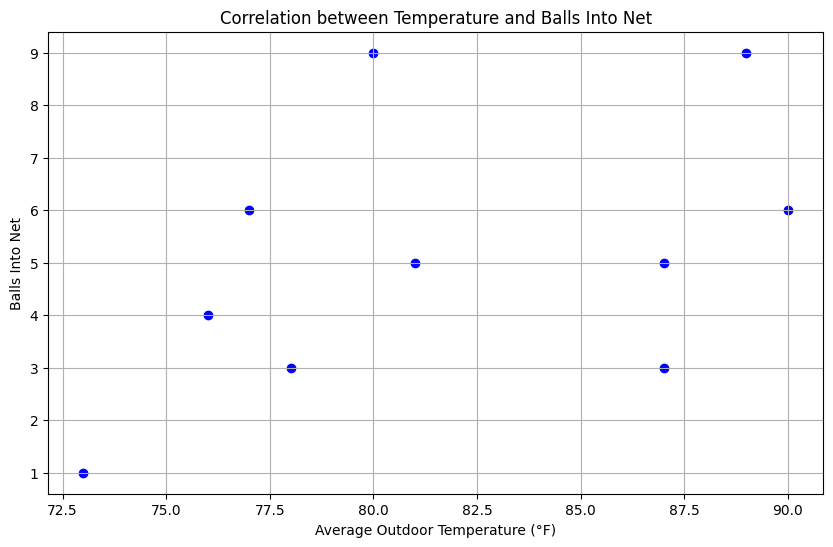

In [20]:
# Creating a graph that shows the correlation between overhit balls and the temperature
%matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Average Outdoor Temperature (°F)'], df['Balls Into Net'], color='blue')
plt.title('Correlation between Temperature and Balls Into Net')
plt.xlabel('Average Outdoor Temperature (°F)')
plt.ylabel('Balls Into Net')
plt.grid(True)
plt.show()

In [22]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient (r value)
r_value, _ = pearsonr(df['Average Outdoor Temperature (°F)'], df['Balls Into Net'])
print(r_value)

0.4563701523037892


>> There isn't any correlation between net hit balls and the temperature

Using matplotlib backend: module://matplotlib_inline.backend_inline


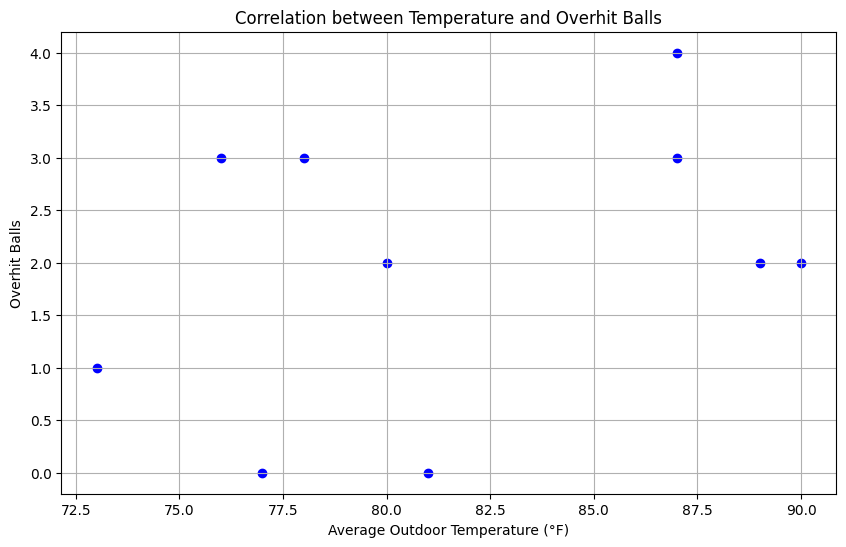

In [23]:
# Creating a graph that shows the correlation between net hit balls and the temperature
%matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Average Outdoor Temperature (°F)'], df['Overhit Balls'], color='blue')
plt.title('Correlation between Temperature and Overhit Balls')
plt.xlabel('Average Outdoor Temperature (°F)')
plt.ylabel('Overhit Balls')
plt.grid(True)
plt.show()

In [24]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient (r value)
r_value, p_value = pearsonr(df['Average Outdoor Temperature (°F)'], df['Overhit Balls'])
print(r_value, p_value)

0.36022276754869653 0.3065474572744082


>> There isn't any correlation between overhit balls and the temperature

In [25]:
# Creating a ratio to see the mistakes made to how many points scored
df['Mistake Ratio'] = (df['Balls Into Net'] + df['Overhit Balls']) / df["Points For"]

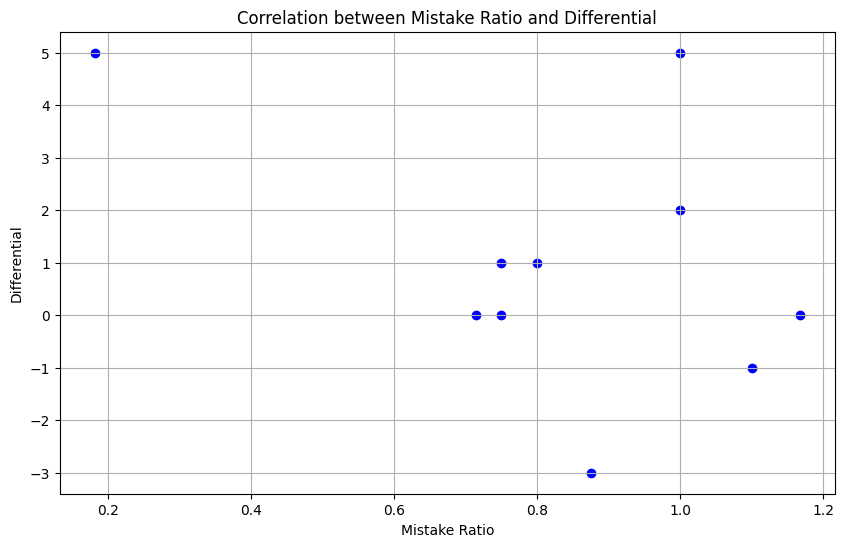

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Mistake Ratio'], df['Differential'], color='blue')
plt.title('Correlation between Mistake Ratio and Differential')
plt.xlabel('Mistake Ratio')
plt.ylabel('Differential')
plt.grid(True)
plt.show()

In [27]:
df.dtypes

Name                                 object
Game                                  int64
Average Outdoor Temperature (°F)      int64
Points For                            int64
Points Conceded                       int64
Balls Into Net                        int64
Overhit Balls                         int64
Distance Traveled (miles)           float64
Average Heart Rate (bpm)              int64
Differential                          int64
Mistake Ratio                       float64
dtype: object

## Comments:


Group:

Zach Guccione
Maurice Gleiser
Javier Sayle

Personal Comment:

I believe I aided a lot in the overall result; while Zach was in charge of doing the development, I would support him debugging our code; while the three of us would offer valuable ideas in operation and measuring performance.